<a href="https://colab.research.google.com/github/carvalheirafc/dim0097/blob/master/lista3/Resposta_da_Lista_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

## Group
* Airton Everton;
* Carlos Frederico.

## OBS Professor

A seção abaixo("Download files from Drive") não precisa ser executada, é só fazer o upload dos arquivos no menu lateral esquerdo e verificar se os nome estão iguais aos nomes da seção "Load Files".

# Download files from Drive

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# id folder shared in drive
id_folder_drive = '1Rj2a65NJ1zmxMS5LYZGZ-GtFKqDd3EaG'

# get all files in folder
file_list = drive.ListFile({ 'q': "'%s' in parents and trashed=false" % id_folder_drive }).GetList()

for f in file_list:
  # files filter
  if '.ipynb' not in f['title'] and '.pdf' not in f['title']:
    # download file
    f.GetContentFile(f['title'])

# Imports

In [28]:
import cv2
import imutils
from PIL import Image
import numpy as np
from numpy import fft
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans, DBSCAN
from pylab import rcParams
from scipy import stats
import seaborn as sn
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


# Load Files

In [3]:
iris = pd.read_excel('IRIS_Reduzido.xlsx')
diabetes = pd.read_excel('Diabetes_Original.xlsx')
diabetes

,Gravidez,Glicose,Pressão,Pele,Insulina,Massa Corpórea,Genealogia,Idade,Diagnóstico
0,6,148,72,35,0,33.6,0.6,50,2
1,1,85,66,29,0,26.6,0.4,31,1
2,8,183,64,0,0,23.3,0.7,32,2
3,1,89,66,23,94,28.1,0.2,21,1
4,0,137,40,35,168,43.1,2.3,33,2
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.2,63,1
764,2,122,70,27,0,36.8,0.3,27,1
765,5,121,72,23,112,26.2,0.2,30,1
766,1,126,60,0,0,30.1,0.3,47,2


In [4]:
# data cleaning
iris = iris.dropna(how='all').dropna(axis=1, how='all')
iris.columns = iris.iloc[0]
iris = iris[1:].reset_index(drop=True)
species = iris.Species.unique()

# discretization
for i, category in enumerate(species, start=1):
  iris.Species[iris.Species == category] = i

iris = iris.astype(float)
iris

1,Sepal length,Sepal width,Petal length,Petal width,Species
0,7.0,3.2,4.7,1.4,1.0
1,6.4,3.2,4.5,1.5,1.0
2,6.9,3.1,4.9,1.5,1.0
3,5.5,2.3,4.0,1.3,1.0
4,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2.0
96,6.3,2.5,5.0,1.9,2.0
97,6.5,3.0,5.2,2.0,2.0
98,6.2,3.4,5.4,2.3,2.0


# Question 1

## a)

In [5]:
# add const random state
iris_training, iris_test = train_test_split(iris, test_size=0.3)

iris_training

1,Sepal length,Sepal width,Petal length,Petal width,Species
93,6.8,3.2,5.9,2.3,2.0
80,7.4,2.8,6.1,1.9,2.0
71,5.6,2.8,4.9,2.0,2.0
88,6.0,3.0,4.8,1.8,2.0
44,5.6,2.7,4.2,1.3,1.0
...,...,...,...,...,...
47,6.2,2.9,4.3,1.3,1.0
19,5.6,2.5,3.9,1.1,1.0
52,7.1,3.0,5.9,2.1,2.0
98,6.2,3.4,5.4,2.3,2.0


In [6]:
iris_test

1,Sepal length,Sepal width,Petal length,Petal width,Species
55,7.6,3.0,6.6,2.1,2.0
21,6.1,2.8,4.0,1.3,1.0
41,6.1,3.0,4.6,1.4,1.0
33,6.0,2.7,5.1,1.6,1.0
86,6.3,3.4,5.6,2.4,2.0
34,5.4,3.0,4.5,1.5,1.0
76,6.2,2.8,4.8,1.8,2.0
61,6.4,2.7,5.3,1.9,2.0
5,5.7,2.8,4.5,1.3,1.0
24,6.4,2.9,4.3,1.3,1.0


## b)

A estratégia usada para gerar a arvore foi percorrer cada variável e pegar a que separa mais itens de uma única classe nos periféricos(de um lado ou do outro) e ir adicionando como nó na arvore e filtrando o conjunto de dados.
Perceba que isso gerará propositalmente uma arvore desbalanceada mas que atente o mesmo objetivo.

In [7]:
def generate_tree(data):
  tree = node = {}
  while True:
    c1 = data.Species == 1
    c2 = data.Species == 2
    if c1.all():
      node['next'] = 1
      return tree
    if c2.all():
      node['next'] = 2
      return tree
    if node.get('class'):
      node['next'] = node = {}

    count = []
    for attr in data.columns[:-1]:
      col = data[attr]
      c1_col, c2_col = col[c1], col[c2]
      c1_min, c2_min = c1_col.min(), c2_col.min()
      c1_max, c2_max = c1_col.max(), c2_col.max()

      if c1_min < c2_min:
        count.append(((c1_col < c2_min).sum(), 1, attr, c2_min, True))
      else:
        count.append(((c2_col < c1_min).sum(), 2, attr, c1_min, True))

      if c1_max > c2_max:
        count.append(((c1_col > c2_max).sum(), 1, attr, c2_max, False))
      else:
        count.append(((c2_col > c1_max).sum(), 2, attr, c1_max, False))

    _, node['class'], attr, cut, is_min = max(count, key=lambda i: i[0])
    node['cut'] = cut
    node['attr'] = attr
    node['is_min'] = is_min
    data = data[data[attr] >= cut if is_min else data[attr] <= cut]

tree = generate_tree(iris_training)
tree

{'attr': 'Petal length ',
 'class': 2,
 'cut': 4.9,
 'is_min': False,
 'next': {'attr': 'Petal width',
  'class': 1,
  'cut': 1.7,
  'is_min': True,
  'next': {'attr': 'Sepal width ',
   'class': 2,
   'cut': 3.2,
   'is_min': True,
   'next': 1}}}

In [8]:
def categorize_by_tree(data, tree):
  result = []
  for i, row in data.iterrows():
    node = tree
    while type(node) == dict:
      is_min, value, cut = node['is_min'], row[node['attr']], node['cut']
      if (is_min and value < cut) or (not is_min and value > cut):
        node = node['class']
      else:
        node = node['next']
    result.append(node)
  return result

iris_result = iris_test.copy()
iris_result['result_tree'] = categorize_by_tree(iris_test, tree)
iris_result

1,Sepal length,Sepal width,Petal length,Petal width,Species,result_tree
55,7.6,3.0,6.6,2.1,2.0,2
21,6.1,2.8,4.0,1.3,1.0,1
41,6.1,3.0,4.6,1.4,1.0,1
33,6.0,2.7,5.1,1.6,1.0,2
86,6.3,3.4,5.6,2.4,2.0,2
34,5.4,3.0,4.5,1.5,1.0,1
76,6.2,2.8,4.8,1.8,2.0,2
61,6.4,2.7,5.3,1.9,2.0,2
5,5.7,2.8,4.5,1.3,1.0,1
24,6.4,2.9,4.3,1.3,1.0,1


## c)

In [9]:
matrix = [[
  np.logical_and(iris_result.Species == i, iris_result.result_tree == j).sum()
    for j in range(1, 3)]
      for i in range(1, 3)]

print('Acurácia:', np.trace(matrix) / len(iris_result) * 100, '%\n')
print('Total Erros:', (iris_result.Species != iris_result.result_tree).sum(), '\n')

print('Matriz de Confusão:')
pd.DataFrame(matrix, species, species)

Acurácia: 93.33333333333333 %

Total Erros: 2 

Matriz de Confusão:


,versicolor,virginica
versicolor,14,2
virginica,0,14


**OBS:** Como o conjunto de treino é escolhido aleatoriamente, cada execução gera valores distintos, mas bem próximos.

Como neste caso não estamos trabalhando com positivos e negativos, só podemos contar o total de falsos, simplesmente somando a diagonal secundaria. Que para este caso está como Total Erros.

# Question 2

## a)

In [10]:
iris_training

1,Sepal length,Sepal width,Petal length,Petal width,Species
93,6.8,3.2,5.9,2.3,2.0
80,7.4,2.8,6.1,1.9,2.0
71,5.6,2.8,4.9,2.0,2.0
88,6.0,3.0,4.8,1.8,2.0
44,5.6,2.7,4.2,1.3,1.0
...,...,...,...,...,...
47,6.2,2.9,4.3,1.3,1.0
19,5.6,2.5,3.9,1.1,1.0
52,7.1,3.0,5.9,2.1,2.0
98,6.2,3.4,5.4,2.3,2.0


In [11]:
iris_test

1,Sepal length,Sepal width,Petal length,Petal width,Species
55,7.6,3.0,6.6,2.1,2.0
21,6.1,2.8,4.0,1.3,1.0
41,6.1,3.0,4.6,1.4,1.0
33,6.0,2.7,5.1,1.6,1.0
86,6.3,3.4,5.6,2.4,2.0
34,5.4,3.0,4.5,1.5,1.0
76,6.2,2.8,4.8,1.8,2.0
61,6.4,2.7,5.3,1.9,2.0
5,5.7,2.8,4.5,1.3,1.0
24,6.4,2.9,4.3,1.3,1.0


## b)

In [12]:
# Detalhamento: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

clf = DecisionTreeClassifier()
clf.fit(iris_training.iloc[:, :-1], iris_training.iloc[:, -1:])

iris_result = iris_test.copy()
iris_result['result_tree'] = clf.predict(iris_test.iloc[:, :-1])
iris_result

1,Sepal length,Sepal width,Petal length,Petal width,Species,result_tree
55,7.6,3.0,6.6,2.1,2.0,2.0
21,6.1,2.8,4.0,1.3,1.0,1.0
41,6.1,3.0,4.6,1.4,1.0,1.0
33,6.0,2.7,5.1,1.6,1.0,2.0
86,6.3,3.4,5.6,2.4,2.0,2.0
34,5.4,3.0,4.5,1.5,1.0,1.0
76,6.2,2.8,4.8,1.8,2.0,2.0
61,6.4,2.7,5.3,1.9,2.0,2.0
5,5.7,2.8,4.5,1.3,1.0,1.0
24,6.4,2.9,4.3,1.3,1.0,1.0


## c)

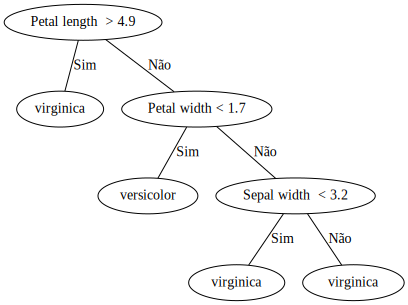

In [13]:
from graphviz import Graph as Graphviz

gv = Graphviz()
node = tree
last = None
i = 0
while True:
  curr = node['attr'] + (' < ' if node['is_min'] else ' > ') + str(node['cut'])
  if last:
    gv.edge(last, curr, 'Não')
  last = curr
  gv.edge(last, species[node['class']-1] + i*' ', 'Sim')
  i += 1
  if type(node['next']) != dict:
    gv.edge(last, species[node['class']-1] + i*' ', 'Não')
    break
  node = node['next']

gv

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


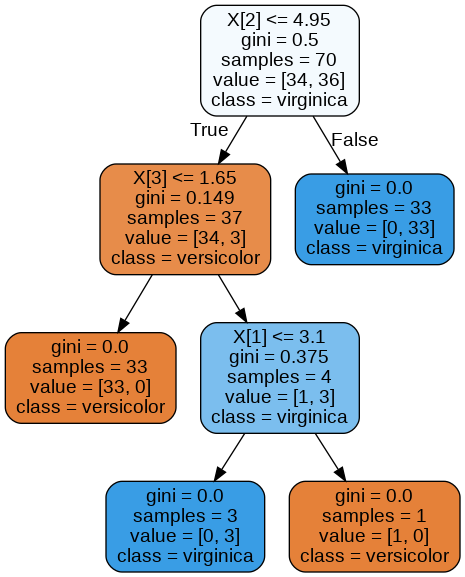

In [14]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, class_names=species)
Image(pydotplus.graph_from_dot_data(dot_data.getvalue()).create_png())

Podemos perceber que em praticamente todas as vezes nosso árvore possui menos níveis, mesmo a da biblioteca sendo mais balanceada a eficiência do tempo de execução da nossa é bem inferior.

## d)

In [15]:
matrix = [[
  np.logical_and(iris_result.Species == i, iris_result.result_tree == j).sum()
    for j in range(1, 3)]
      for i in range(1, 3)]

print('Acurácia:', np.trace(matrix) / len(iris_result) * 100, '%\n')
print('Total Erros:', (iris_result.Species != iris_result.result_tree).sum(), '\n')

print('Matriz de Confusão:')
pd.DataFrame(matrix, species, species)

Acurácia: 93.33333333333333 %

Total Erros: 2 

Matriz de Confusão:


,versicolor,virginica
versicolor,14,2
virginica,0,14


## e)

Como o conjunto de treino é aleatório, varia um pouco, mas na grande maioria da vezes, a nossa árvore tem uma maio acurácia e consequentemente manor número de erros.

# Question 3

## a)

In [16]:
print('Conjunto de Treino Iris.........>', iris_training.to_numpy().shape)
print('Conjunto de Teste Iris..........>', iris_test.to_numpy().shape)
print('Classes do conjunto...>', pd.unique(iris_test['Species']))

Conjunto de Treino Iris.........> (70, 5)
Conjunto de Teste Iris..........> (30, 5)
Classes do conjunto...> [2. 1.]


## b)

In [17]:
X_train = iris_training.iloc[:, iris_training.columns!='Species'].to_numpy()
X_test = iris_test.iloc[:, iris_test.columns!='Species'].to_numpy()

y_train = iris_training['Species'].to_numpy()
y_test = iris_test['Species'].to_numpy()

print('Conjunto de Features do conjunto de treino....>', X_train.shape)
print('Conjunto de Features do conjunto de teste......>', X_test.shape)
print('Classes do conjunto de treino', y_train.shape)
print('\nBagging Classifier...')

classifier = BaggingClassifier(n_estimators=5, random_state=42, verbose=1).fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

Conjunto de Features do conjunto de treino....> (70, 4)
Conjunto de Features do conjunto de teste......> (30, 4)
Classes do conjunto de treino (70,)

Bagging Classifier...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


## c)

In [18]:
# correlation

## d)

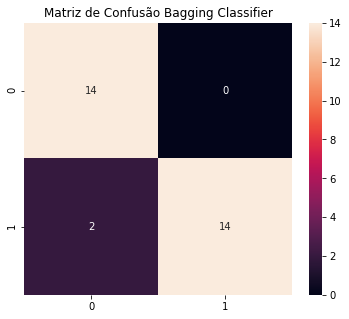


Acurácia....: 93.33333333333333 %
Total Erros.: 2 



In [19]:
fig = plt.figure(figsize=(6,5))
matrix = confusion_matrix(y_predicted, y_test)
sn.heatmap(matrix, annot=True)
plt.title('Matriz de Confusão Bagging Classifier')
plt.show()

 
print('\nAcurácia....:', np.trace(matrix) / np.sum(matrix) * 100, '%')
print('Total Erros.:', (y_test != y_predicted).sum(), '\n')

# Question 4

## a)

In [20]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gravidez,768.0,3.845052,3.369578,0.0,1.0,3.0,6.00,17.0
Glicose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
Pressão,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
Pele,768.0,20.536458,15.952218,0.0,0.0,23.0,32.00,99.0
Insulina,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
Massa Corpórea,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1
Genealogia,768.0,0.472266,0.332348,0.1,0.2,0.4,0.60,2.4
Idade,768.0,33.240885,11.760232,21.0,24.0,29.0,41.00,81.0
Diagnóstico,768.0,1.348958,0.476951,1.0,1.0,1.0,2.00,2.0


In [21]:
diabetes = diabetes.dropna(how='all').dropna(axis=1, how='all')
diabetes = diabetes[1:].reset_index(drop=True)
diabetes.head()

,Gravidez,Glicose,Pressão,Pele,Insulina,Massa Corpórea,Genealogia,Idade,Diagnóstico
0,1,85,66,29,0,26.6,0.4,31,1
1,8,183,64,0,0,23.3,0.7,32,2
2,1,89,66,23,94,28.1,0.2,21,1
3,0,137,40,35,168,43.1,2.3,33,2
4,5,116,74,0,0,25.6,0.2,30,1


In [23]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gravidez,767.0,3.842243,3.370877,0.0,1.0,3.0,6.0,17.0
Glicose,767.0,120.859192,31.978468,0.0,99.0,117.0,140.0,199.0
Pressão,767.0,69.101695,19.368155,0.0,62.0,72.0,80.0,122.0
Pele,767.0,20.517601,15.954059,0.0,0.0,23.0,32.0,99.0
Insulina,767.0,79.903520,115.283105,0.0,0.0,32.0,127.5,846.0
Massa Corpórea,767.0,31.990482,7.889091,0.0,27.3,32.0,36.6,67.1
Genealogia,767.0,0.472099,0.332533,0.1,0.2,0.4,0.6,2.4
Idade,767.0,33.219035,11.752296,21.0,24.0,29.0,41.0,81.0
Diagnóstico,767.0,1.348110,0.476682,1.0,1.0,1.0,2.0,2.0


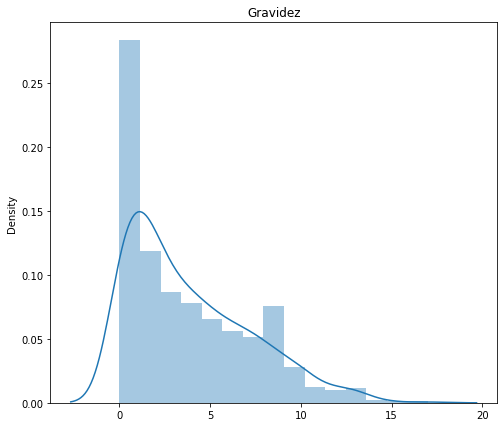

Mean: 3.8422425032594525
Median: 3.0
Variance: 11.347993928154386
Std: 3.3686783651981953




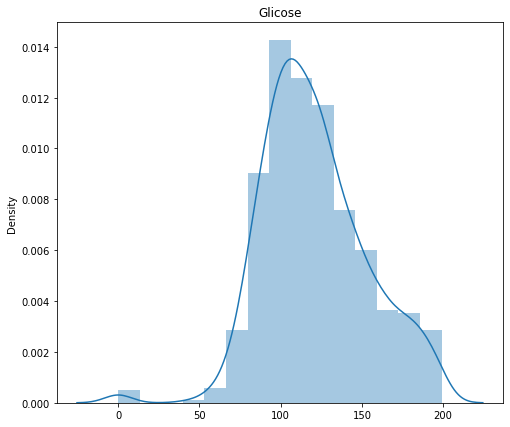

Mean: 120.85919165580182
Median: 117.0
Variance: 1021.2891690988613
Std: 31.957615197302523




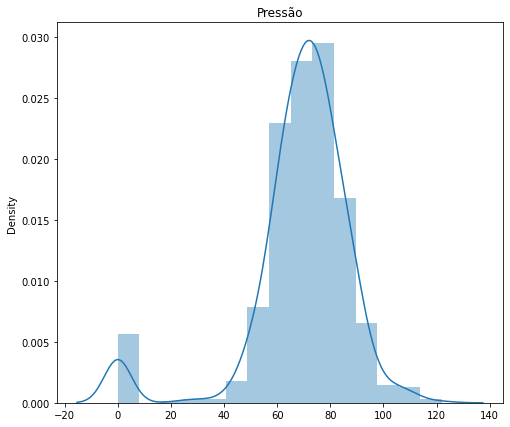

Mean: 69.10169491525424
Median: 72.0
Variance: 374.636333502749
Std: 19.355524624839003




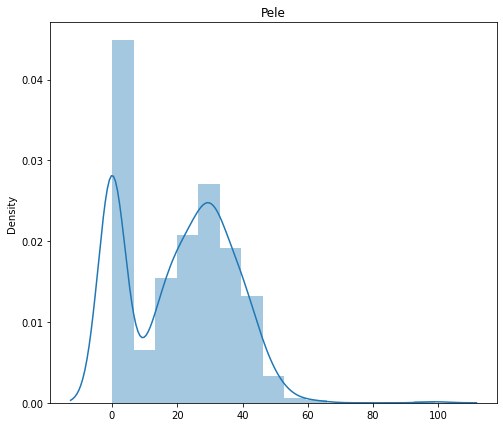

Mean: 20.517601043024772
Median: 23.0
Variance: 254.20014652662238
Std: 15.943655369037




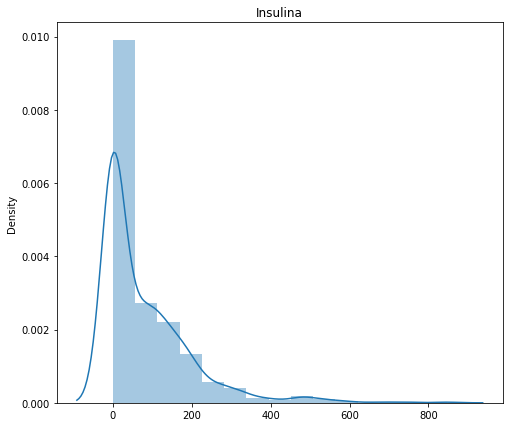

Mean: 79.90352020860496
Median: 32.0
Variance: 13272.866832458109
Std: 115.20792868747407




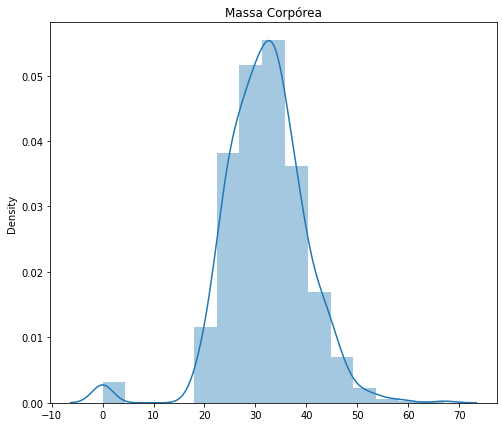

Mean: 31.990482398956953
Median: 32.0
Variance: 62.1566108494294
Std: 7.883946400720226




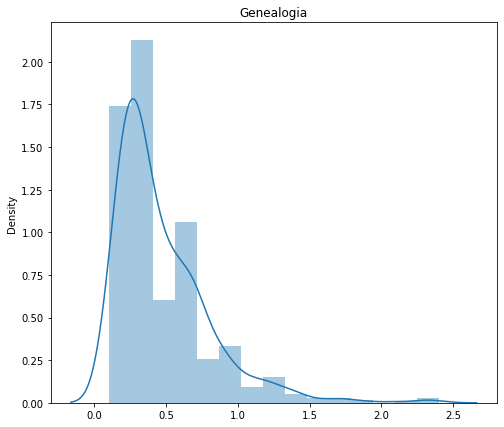

Mean: 0.4720990873533245
Median: 0.4
Variance: 0.11043405537074519
Std: 0.33231619787597655




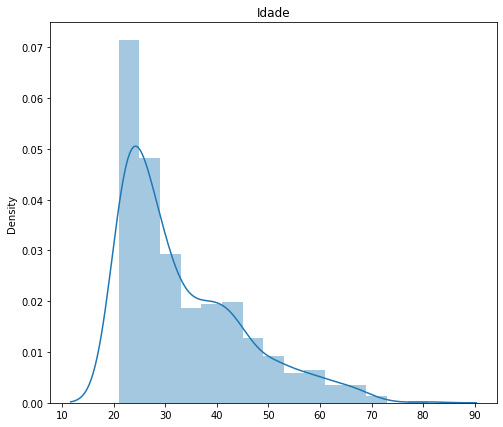

Mean: 33.21903520208605
Median: 29.0
Variance: 137.93637820866945
Std: 11.744631889023575




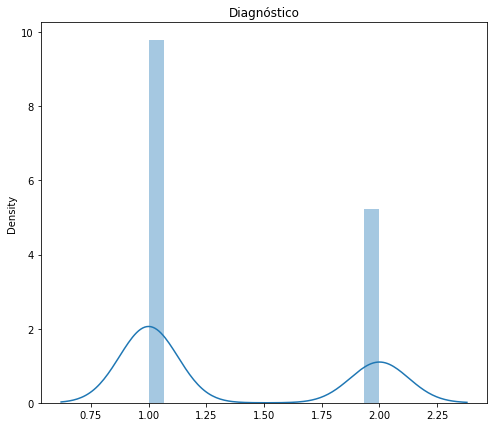

Mean: 1.348109517601043
Median: 1.0
Variance: 0.22692928135661378
Std: 0.4763709493206043




In [29]:
def stats(variable):
  var_dic = {}
  var_dic['Mean'] = np.mean(variable)
  var_dic['Median'] = np.median(variable)
  var_dic['Variance'] = np.var(variable)
  var_dic['Std'] = np.std(variable)
  return var_dic

def describe_custom(variable, print_data=True):
  dic = stats(variable)
  
  fig, ax = plt.subplots(figsize=(8,7))
  ax = sn.distplot(variable, bins=15)
  ax.set_title(variable.name)
  ax.set_xlabel('')
  plt.show()
  if print_data == True:
    for key in dic:
      print('{}: '.format(key) + '{}'.format(dic[key]))
    print('\n')


for column in diabetes.columns:
  describe_custom(diabetes[column])

In [30]:
'''
Z-Score Normalization
'''
z_scaler = preprocessing.StandardScaler()
data_zscore = pd.DataFrame(z_scaler.fit_transform(diabetes.to_numpy()), 
                            columns=diabetes.columns)
data_zscore.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gravidez,767.0,-6.947941e-17,1.000653,-1.140579,-0.843726,-0.250022,0.640535,3.905911
Glicose,767.0,1.113118e-16,1.000653,-3.781859,-0.684006,-0.120760,0.598944,2.445139
Pressão,767.0,-2.477013e-16,1.000653,-3.570128,-0.366908,0.149740,0.563059,2.732982
Pele,767.0,-1.679086e-17,1.000653,-1.286882,-1.286882,0.155698,0.720186,4.922485
Insulina,767.0,-1.334584e-16,1.000653,-0.693559,-0.693559,-0.415801,0.413135,6.649685
Massa Corpórea,767.0,5.453772e-16,1.000653,-4.057674,-0.594941,0.001207,0.584671,4.453292
Genealogia,767.0,8.569127e-17,1.000653,-1.119714,-0.818796,-0.216959,0.384877,5.801405
Idade,767.0,1.734090e-16,1.000653,-1.040393,-0.784957,-0.359231,0.662512,4.068324
Diagnóstico,767.0,-4.950408e-17,1.000653,-0.730753,-0.730753,-0.730753,1.368451,1.368451


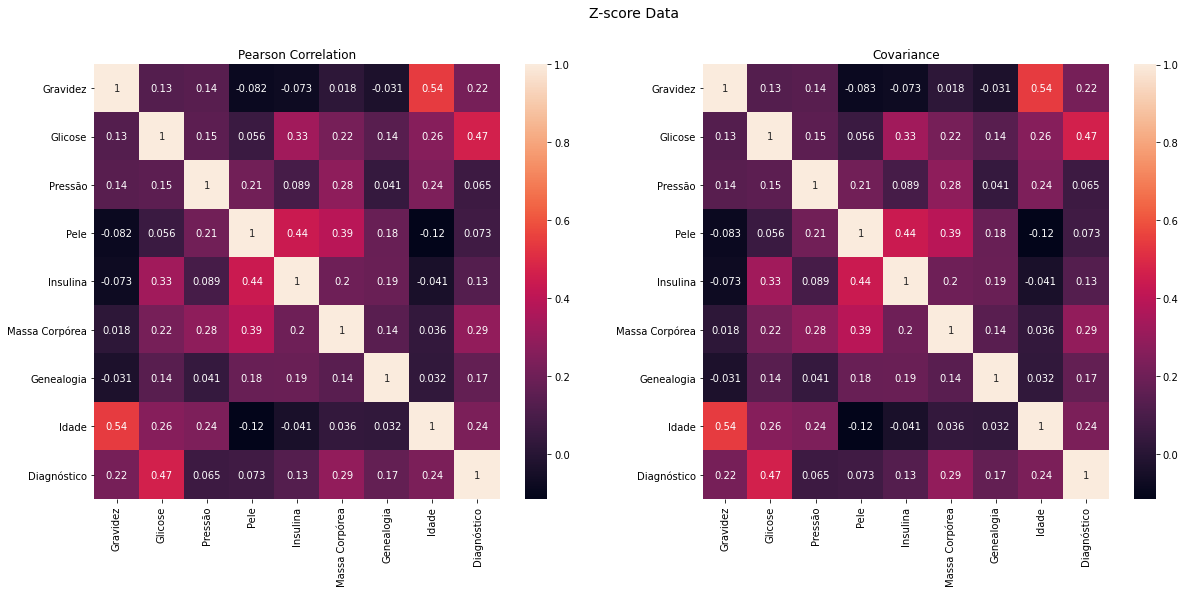

In [37]:
'''
Z-score Data
Correlation and Covariance Matrix

'''
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Z-score Data', fontsize=14)

ax = sn.heatmap(data_zscore.corr(method='pearson'),ax=ax[0], annot=True)
ax.set_title('Pearson Correlation')

ax = sn.heatmap(data_zscore.cov(), annot=True)
ax.set_title('Covariance')

plt.show()

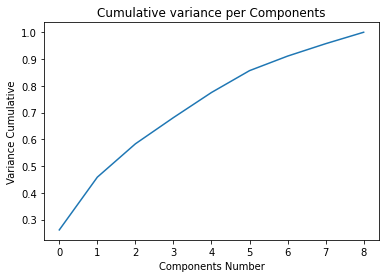

In [38]:
pca = PCA()
pca.fit(data_zscore)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components Number')
plt.ylabel('Variance Cumulative')
plt.title('Cumulative variance per Components')
plt.show()

## b)

## c)

## d)

## e)